In [1]:
#required libraries
import requests
from bs4 import BeautifulSoup

In [2]:
def getpage(URL,no):
    res = requests.get(URL+str(no))
    return res

page=getpage("https://priceoye.pk/mobiles?page=",1)

In [3]:
#see response status
page.status_code

200

In [4]:
# Now we are getting content 
page.content

b'<!doctype html>\n<html dir="ltr" lang="en">\n\n<head>\n    <meta charset="utf-8" />\n    <title>\n        Find the Latest Mobile Prices in Pakistan | PriceOye    </title>\n\n    <link rel="preconnect" href="//cdn.ampproject.org">\n    <link rel="preconnect" href="https://fonts.googleapis.com">\n    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>\n    <link href="https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&display=swap" rel="stylesheet">\n    \n    <link rel="dns-prefetch" href="//cdn.ampproject.org">\n    <link rel="preconnect" href="//static.priceoye.pk">\n    <link rel="dns-prefetch" href="//static.priceoye.pk">\n    <link rel="preconnect" href="//images.priceoye.pk">\n    <link rel="dns-prefetch" href="//images.priceoye.pk">\n        <link rel="preload" as="image" href="https://static.priceoye.pk/images/placeholder-product-mobile.jpg">\n    <link rel="preload" as="image" href="https://static.priceoye.pk/images/product-placeholder.jpg">\n   

In [5]:
# create beautifulSoup object
soup = BeautifulSoup(page.content, 'html.parser')

In [6]:
#View formatted content
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Find the Latest Mobile Prices in Pakistan | PriceOye
  </title>
  <link href="//cdn.ampproject.org" rel="preconnect"/>
  <link href="https://fonts.googleapis.com" rel="preconnect"/>
  <link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
  <link href="https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&amp;display=swap" rel="stylesheet"/>
  <link href="//cdn.ampproject.org" rel="dns-prefetch"/>
  <link href="//static.priceoye.pk" rel="preconnect"/>
  <link href="//static.priceoye.pk" rel="dns-prefetch"/>
  <link href="//images.priceoye.pk" rel="preconnect"/>
  <link href="//images.priceoye.pk" rel="dns-prefetch"/>
  <link as="image" href="https://static.priceoye.pk/images/placeholder-product-mobile.jpg" rel="preload"/>
  <link as="image" href="https://static.priceoye.pk/images/product-placeholder.jpg" rel="preload"/>
  <meta content="#ffffff" name="msapplication-Tile

In [7]:
# checking for a single product
soup.find('div', class_='productBox b-productBox')

<div class="productBox b-productBox" data-brand="infinix" data-slug="infinix-hot-12-play">
<a class="" href="https://priceoye.pk/mobiles/infinix/infinix-hot-12-play">
<div class="image-box desktop">
<div id="home-badges">
<div class="hme-badge-logo">
<amp-img alt="badges logo" class="" height="70" layout="fixed" src="https://static.priceoye.pk/images/badges/po-mega-sale.png" width="90"></amp-img> </div>
</div>
<amp-img alt="Infinix Hot 12 Play" class="product-thumbnail" height="120" layout="flex-item" src="https://images.priceoye.pk/infinix-hot-12-play-pakistan-priceoye-1sinx-270x270.webp" width="120"><amp-img alt="Infinix Hot 12 Play" class="product-thumbnail" fallback="" height="120" layout="flex-item" src="https://images.priceoye.pk/infinix-hot-12-play-pakistan-priceoye-1sinx-270x270.jpg" width="120"></amp-img><amp-img alt="Infinix Hot 12 Play" layout="fill" placeholder="" src="https://static.priceoye.pk/images/placeholder-product-mobile.jpg">
<noscript>
<img alt="Infinix Hot 12 Pla

In [8]:
MobileAdd=soup.find('div', class_='productBox b-productBox')

print(MobileAdd.find(class_='p-title bold h5').get_text().split()[0])
print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
print(MobileAdd.find(class_='price-box').get_text().strip())
print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
print(MobileAdd.a.get('href').strip())
print(MobileAdd.img.get('src').strip())

# print(car.h3.get_text(strip=True))
# print(car.a.get('href'))
# print(car.find('a').get('href'))
# print(car.find('a').get('data-id'))
# print(car.find(class_='result-price').get_text())
# print(car.find(class_='result-hood').get_text(strip=True))
# print(car.find(class_='result-date').get('title'))
# print(car.find(class_='result-date').get('datetime'))
# print(car.find(class_='result-date').get_text())

Infinix
Infinix Hot 12 Play
Rs. 34,099
Rs. 35,999
(5% OFF)
https://priceoye.pk/mobiles/infinix/infinix-hot-12-play
https://static.priceoye.pk/images/placeholder-product-mobile.jpg


In [9]:
# Total number of Ads on a page
len(soup.find_all('div', class_='productBox b-productBox'))

35

In [10]:
l=[]
for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
       
      ]
    l.append(o)
#     print(l)



display(l)

[['Infinix',
  'Infinix Hot 12 Play',
  'Rs. 34,099',
  '\n                Rs. 35,999            ',
  '\n                (5% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12-play',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Hot 12i',
  'Rs. 38,099',
  '\n                Rs. 42,000            ',
  '\n                (9% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12i',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['ZTE',
  'ZTE Blade A31 Plus',
  'Rs. 18,799',
  '\n                Rs. 22,299            ',
  '\n                (16% OFF)            ',
  'https://priceoye.pk/mobiles/zte/zte-blade-a31-plus',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Jazz',
  'Jazz Digit E3 Pro 4G',
  'Rs. 9,899',
  '\n                Rs. 10,999            ',
  '\n                (10% OFF)            ',
  'https://priceoye.pk/mobiles/digit/digit-e3-p

In [11]:
# checking for Duplicates

new_list = []

for i in l:
    if i not in new_list:
        new_list.append(i)

display(new_list)
print("Length of list is",len(new_list))

[['Infinix',
  'Infinix Hot 12 Play',
  'Rs. 34,099',
  '\n                Rs. 35,999            ',
  '\n                (5% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12-play',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Hot 12i',
  'Rs. 38,099',
  '\n                Rs. 42,000            ',
  '\n                (9% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12i',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['ZTE',
  'ZTE Blade A31 Plus',
  'Rs. 18,799',
  '\n                Rs. 22,299            ',
  '\n                (16% OFF)            ',
  'https://priceoye.pk/mobiles/zte/zte-blade-a31-plus',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Jazz',
  'Jazz Digit E3 Pro 4G',
  'Rs. 9,899',
  '\n                Rs. 10,999            ',
  '\n                (10% OFF)            ',
  'https://priceoye.pk/mobiles/digit/digit-e3-p

Length of list is 35


In [12]:
# Now ill be repeating above Code to scrapt other pages.
# will create a function

In [13]:
# page = requests.get("https://priceoye.pk/mobiles?page=3")
# if(page.status_code == 200):
#     print('Page 2 Fetched Successfully')
    
# soup = BeautifulSoup(page.content, 'html.parser')

# # print(soup.prettify())

# print('Viewing first ad of page 2 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().split()[0]),
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())

# # Total number of Ads on a page
# print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))

# for details in soup.find_all('div', class_='productBox b-productBox'):
#     price_diff_retail=None
#     price_diff_saving=None
#     if details.find(class_='price-diff-retail') is not None:
#           price_diff_retail=details.find(class_='price-diff-retail').get_text()
#     if details.find(class_='price-diff-saving') is not None:
#           price_diff_saving=details.find(class_='price-diff-saving').get_text()
#     o=[
#         details.find(class_='p-title bold h5').get_text().split()[0],
#         details.find(class_='p-title bold h5').get_text().strip(),
#         details.find(class_='price-box').get_text().strip(),
#         price_diff_retail,
#         price_diff_saving,
#         details.a.get('href').strip(),
#         details.img.get('src').strip()
#     ]
#     l.append(o)

# for i in l:
#     if i not in new_list:
#         new_list.append(i)

# # display(new_list)
# print("Length of list is",len(new_list))

# # display(new_list)


In [14]:
pageNumber=0
adsOnthisPage=1
while adsOnthisPage != 0: 
    page=getpage("https://priceoye.pk/mobiles?page=",pageNumber+1)

    if(page.status_code == 200):
        print('Page',pageNumber+1,'Fetched Successfully')

    soup = BeautifulSoup(page.content, 'html.parser')

    pageNumber=pageNumber+1
    # Total number of Ads on a page
    adsOnthisPage=len(soup.find_all('div', class_='productBox b-productBox'))
    print("Total number of Ads this page :",adsOnthisPage)


    for details in soup.find_all('div', class_='productBox b-productBox'):
        price_diff_retail=None
        price_diff_saving=None
        if details.find(class_='price-diff-retail') is not None:
              price_diff_retail=details.find(class_='price-diff-retail').get_text()
        if details.find(class_='price-diff-saving') is not None:
              price_diff_saving=details.find(class_='price-diff-saving').get_text()
        o=[
            details.find(class_='p-title bold h5').get_text().split()[0],
            details.find(class_='p-title bold h5').get_text().strip(),
            details.find(class_='price-box').get_text().strip(),
            price_diff_retail,
            price_diff_saving,
            details.a.get('href').strip(),
            details.img.get('src').strip()
        ]

        l.append(o)


    for i in l:
        if i not in new_list:
            new_list.append(i)

    # display(new_list)
    print("Currently on page",pageNumber,"Length of list is",len(new_list),"\n\n")

    # display(new_list)


Page 1 Fetched Successfully
Total number of Ads this page : 35
Currently on page 1 Length of list is 35 


Page 2 Fetched Successfully
Total number of Ads this page : 35
Currently on page 2 Length of list is 69 


Page 3 Fetched Successfully
Total number of Ads this page : 35
Currently on page 3 Length of list is 100 


Page 4 Fetched Successfully
Total number of Ads this page : 35
Currently on page 4 Length of list is 134 


Page 5 Fetched Successfully
Total number of Ads this page : 35
Currently on page 5 Length of list is 167 


Page 6 Fetched Successfully
Total number of Ads this page : 35
Currently on page 6 Length of list is 202 


Page 7 Fetched Successfully
Total number of Ads this page : 35
Currently on page 7 Length of list is 237 


Page 8 Fetched Successfully
Total number of Ads this page : 35
Currently on page 8 Length of list is 272 


Page 9 Fetched Successfully
Total number of Ads this page : 35
Currently on page 9 Length of list is 307 


Page 10 Fetched Successfully
T

In [15]:
# Now we have done Scrapping, we are focusing on Data Cleaning and Visualization

# List to dataFrame

In [16]:
# setting Colomn Names

import pandas as pd    

df = pd.DataFrame(new_list,columns= ['Brand', 'Phone_Name', 'Price', 'MarketPrice','Discount','Link', 'ImageLink'])

display(df)
#df = pd.read_csv('MobileData.csv')

df.to_csv("MobileData.csv",index=False)
df = pd.read_csv('MobileData.csv')
display(df)

,Brand,Phone_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Infinix,Infinix Hot 12 Play,"Rs. 34,099","\n Rs. 35,999",\n (5% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
1,Infinix,Infinix Hot 12i,"Rs. 38,099","\n Rs. 42,000",\n (9% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
2,ZTE,ZTE Blade A31 Plus,"Rs. 18,799","\n Rs. 22,299",\n (16% OFF),https://priceoye.pk/mobiles/zte/zte-blade-a31-...,https://static.priceoye.pk/images/placeholder-...
3,Jazz,Jazz Digit E3 Pro 4G,"Rs. 9,899","\n Rs. 10,999",\n (10% OFF),https://priceoye.pk/mobiles/digit/digit-e3-pro-4g,https://static.priceoye.pk/images/placeholder-...
4,Realme,Realme C25Y,"Rs. 36,699","\n Rs. 49,999",\n (27% OFF),https://priceoye.pk/mobiles/realme/realme-c25y,https://static.priceoye.pk/images/placeholder-...
...,...,...,...,...,...,...,...
312,REMAX,REMAX Thunder Pro,"Rs. 2,710",None,None,https://priceoye.pk/mobiles/remaxx/remax-thund...,https://static.priceoye.pk/images/placeholder-...
313,Faywa,Faywa Magic 2,"Rs. 2,175",None,None,https://priceoye.pk/mobiles/faywa/faywa-magic-2,https://static.priceoye.pk/images/placeholder-...
314,Calme,Calme Classic,"Rs. 2,600",None,None,https://priceoye.pk/mobiles/calme/calme-classic,https://static.priceoye.pk/images/placeholder-...
315,Huawei,Huawei Nova 5z,"Rs. 38,999",None,None,https://priceoye.pk/mobiles/huawei/huawei-nova-5z,https://static.priceoye.pk/images/placeholder-...


,Brand,Phone_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Infinix,Infinix Hot 12 Play,"Rs. 34,099","\n Rs. 35,999",\n (5% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
1,Infinix,Infinix Hot 12i,"Rs. 38,099","\n Rs. 42,000",\n (9% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
2,ZTE,ZTE Blade A31 Plus,"Rs. 18,799","\n Rs. 22,299",\n (16% OFF),https://priceoye.pk/mobiles/zte/zte-blade-a31-...,https://static.priceoye.pk/images/placeholder-...
3,Jazz,Jazz Digit E3 Pro 4G,"Rs. 9,899","\n Rs. 10,999",\n (10% OFF),https://priceoye.pk/mobiles/digit/digit-e3-pro-4g,https://static.priceoye.pk/images/placeholder-...
4,Realme,Realme C25Y,"Rs. 36,699","\n Rs. 49,999",\n (27% OFF),https://priceoye.pk/mobiles/realme/realme-c25y,https://static.priceoye.pk/images/placeholder-...
...,...,...,...,...,...,...,...
312,REMAX,REMAX Thunder Pro,"Rs. 2,710",NaN,NaN,https://priceoye.pk/mobiles/remaxx/remax-thund...,https://static.priceoye.pk/images/placeholder-...
313,Faywa,Faywa Magic 2,"Rs. 2,175",NaN,NaN,https://priceoye.pk/mobiles/faywa/faywa-magic-2,https://static.priceoye.pk/images/placeholder-...
314,Calme,Calme Classic,"Rs. 2,600",NaN,NaN,https://priceoye.pk/mobiles/calme/calme-classic,https://static.priceoye.pk/images/placeholder-...
315,Huawei,Huawei Nova 5z,"Rs. 38,999",NaN,NaN,https://priceoye.pk/mobiles/huawei/huawei-nova-5z,https://static.priceoye.pk/images/placeholder-...


In [17]:
# filter data 


def stringFilteration(x):
 x=str(x)

 return (x.replace('Rs.', '').replace(',', '').replace("\n","").replace(" ","").replace("(","").replace(")","").replace("%",""))

df_copy = df.copy(deep=True)
df_copy['Price'] = df_copy['Price'].apply(lambda x:float(stringFilteration(x)))
df_copy['MarketPrice'] = df_copy['MarketPrice'].apply(lambda x:float(stringFilteration(x)))
df_copy['Discount'] = df_copy['Discount'].apply(lambda x:float(stringFilteration(x).replace("OFF","")))


display(df_copy)


,Brand,Phone_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Infinix,Infinix Hot 12 Play,34099.0,35999.0,5.0,https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
1,Infinix,Infinix Hot 12i,38099.0,42000.0,9.0,https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
2,ZTE,ZTE Blade A31 Plus,18799.0,22299.0,16.0,https://priceoye.pk/mobiles/zte/zte-blade-a31-...,https://static.priceoye.pk/images/placeholder-...
3,Jazz,Jazz Digit E3 Pro 4G,9899.0,10999.0,10.0,https://priceoye.pk/mobiles/digit/digit-e3-pro-4g,https://static.priceoye.pk/images/placeholder-...
4,Realme,Realme C25Y,36699.0,49999.0,27.0,https://priceoye.pk/mobiles/realme/realme-c25y,https://static.priceoye.pk/images/placeholder-...
...,...,...,...,...,...,...,...
312,REMAX,REMAX Thunder Pro,2710.0,NaN,NaN,https://priceoye.pk/mobiles/remaxx/remax-thund...,https://static.priceoye.pk/images/placeholder-...
313,Faywa,Faywa Magic 2,2175.0,NaN,NaN,https://priceoye.pk/mobiles/faywa/faywa-magic-2,https://static.priceoye.pk/images/placeholder-...
314,Calme,Calme Classic,2600.0,NaN,NaN,https://priceoye.pk/mobiles/calme/calme-classic,https://static.priceoye.pk/images/placeholder-...
315,Huawei,Huawei Nova 5z,38999.0,NaN,NaN,https://priceoye.pk/mobiles/huawei/huawei-nova-5z,https://static.priceoye.pk/images/placeholder-...


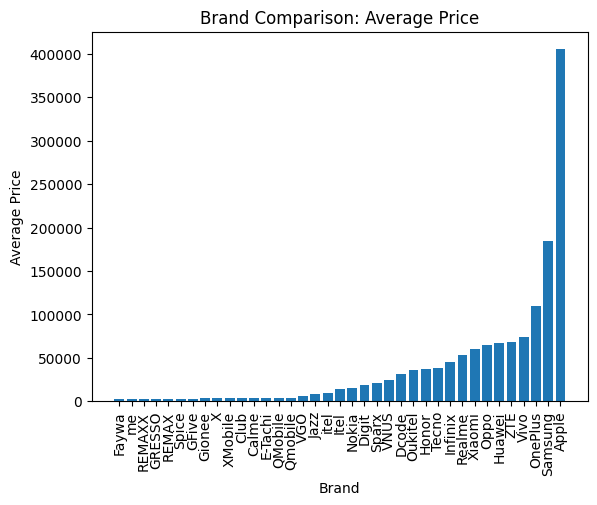

In [18]:
import matplotlib.pyplot as plt

avg_price_by_brand = df_copy.groupby('Brand')['Price'].mean().sort_values()

# Create a bar plot
plt.bar(avg_price_by_brand.index, avg_price_by_brand.values)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [19]:
print("We Deduced Most expensive phone are of Apple Brand \nCheapest phone are of Me Brand")

We Deduced Most expensive phone are of Apple Brand 
Cheapest phone are of Me Brand


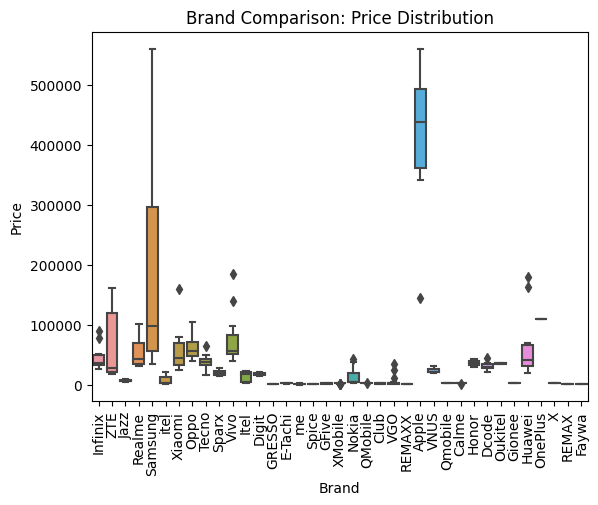

In [20]:
import seaborn as sns

sns.boxplot(data=df_copy, x='Brand', y='Price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand Comparison: Price Distribution')
plt.xticks(rotation=90)
plt.show()

In [21]:
print("Samsung provides phones of all price ranges")

Samsung provides phones of all price ranges


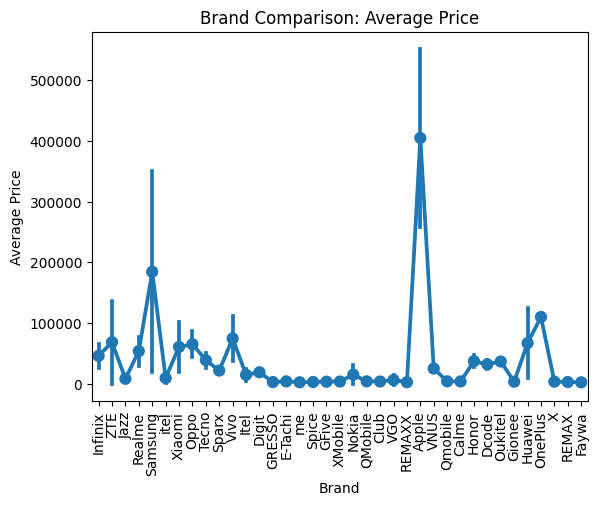

In [22]:

sns.pointplot(data=df_copy, x='Brand', y='Price', errorbar='sd')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python3

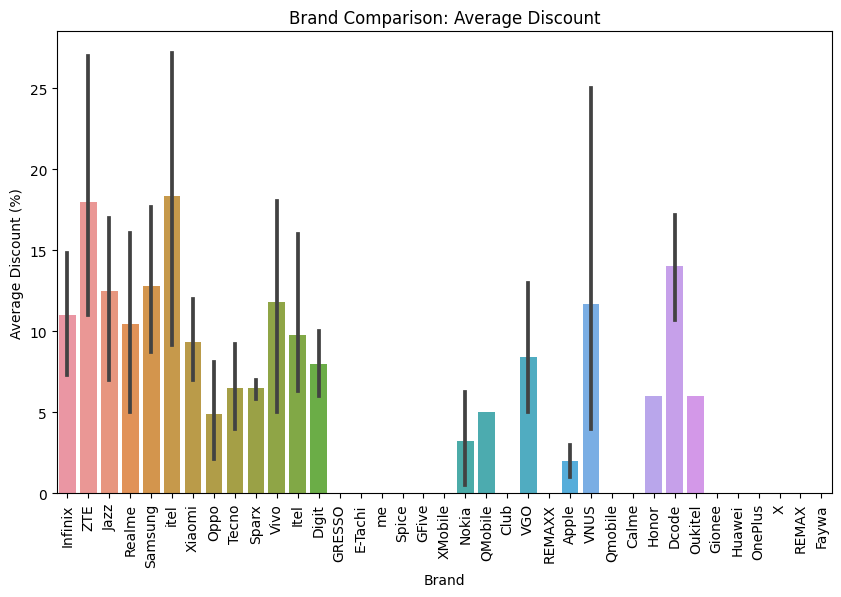

In [23]:
##Bar Plot: A simple bar plot can be used to compare the average discounts for different brands.
plt.figure(figsize=(10, 6))
sns.barplot(data=df_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

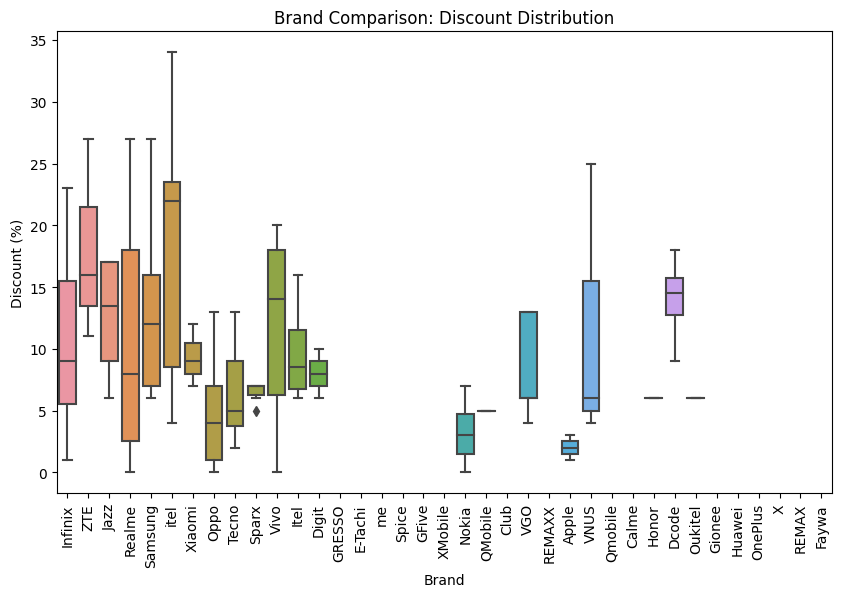

In [24]:
#A box plot can show the distribution of discounts for each brand, allowing you to compare the range and variability of discounts.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Discount (%)')
plt.title('Brand Comparison: Discount Distribution')
plt.xticks(rotation=90)
plt.show()

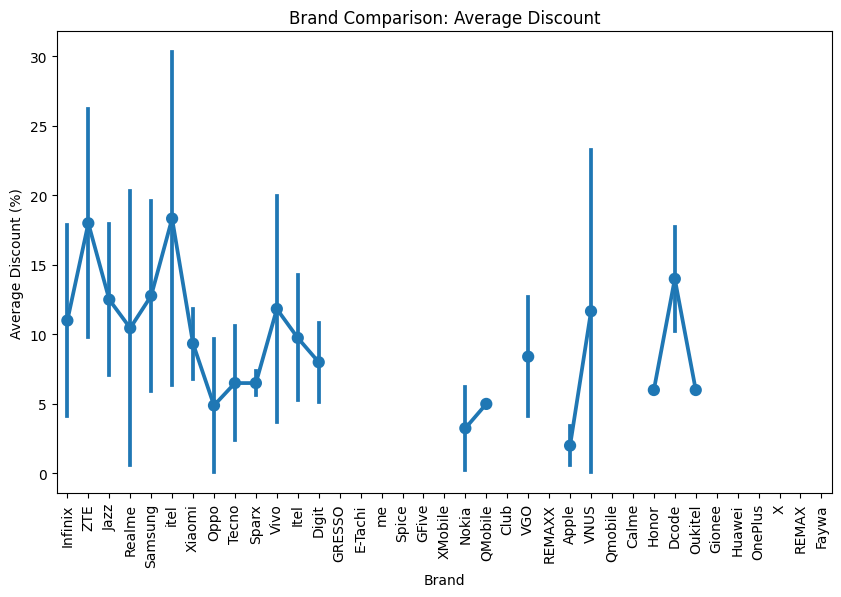

In [25]:
#Point Plot: A point plot can be used to show the average discount for each brand, along with confidence intervals to represent the variability.

plt.figure(figsize=(10, 6))
sns.pointplot(data=df_copy, x='Brand', y='Discount', errorbar='sd')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

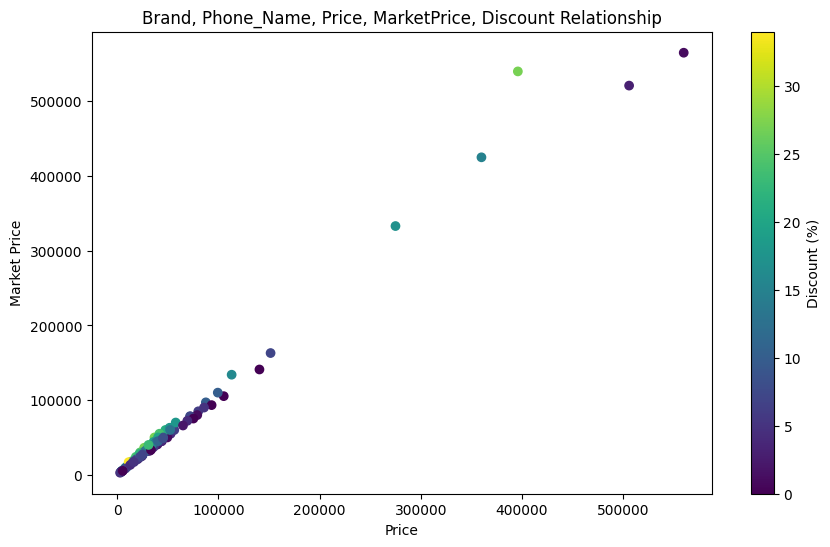

In [26]:
 #show the relationship between Brand, Phone_Name, Price, MarketPrice, and Discount, you can create a scatter plot with different data points representing each combination of these variables. Here's an example using matplotlib:
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['Price'], df_copy['MarketPrice'], c=df_copy['Discount'], cmap='viridis')
plt.colorbar(label='Discount (%)')
plt.xlabel('Price')
plt.ylabel('Market Price')
plt.title('Brand, Phone_Name, Price, MarketPrice, Discount Relationship')
plt.show()

In [27]:
print('\033[1m' + 'Fetching Data for Laptops ' + '\033[0m')

Fetching Data for Laptops 


In [28]:
#required libraries
import requests
from bs4 import BeautifulSoup

def getpage(URL,no):
    res = requests.get(URL+str(no))
    return res

laptop=getpage("https://priceoye.pk/laptops?page=",1)

new_Laptoplist=[]
laptopList=[]


In [29]:
PageNumber=0
addsOnthisPage=1

while addsOnthisPage != 0:
    laptop=getpage("https://priceoye.pk/laptops?page=",PageNumber+1)

    if(laptop.status_code == 200):
        print('Page',PageNumber+1,'Fetched Successfully')

    soup = BeautifulSoup(laptop.content, 'html.parser')

    # Total number of Ads on a page
    addsOnthisPage=len(soup.find_all('div', class_='productBox b-productBox'))
    print("Total number of Ads this page :",addsOnthisPage)


    for details in soup.find_all('div', class_='productBox b-productBox'):
        price_diff_retail=None
        price_diff_saving=None
        if details.find(class_='price-diff-retail') is not None:
              price_diff_retail=details.find(class_='price-diff-retail').get_text()
        if details.find(class_='price-diff-saving') is not None:
              price_diff_saving=details.find(class_='price-diff-saving').get_text()
        o=[
            details.find(class_='p-title bold h5').get_text().split()[0],
            details.find(class_='p-title bold h5').get_text().strip(),
            details.find(class_='price-box').get_text().strip(),
            price_diff_retail,
            price_diff_saving,
            details.a.get('href').strip(),
            details.img.get('src').strip()
        ]

        laptopList.append(o)


    for i in laptopList:
        if i not in new_Laptoplist:
            new_Laptoplist.append(i)

    # display(new_list)
    PageNumber=PageNumber+1
    print("Currently on page",PageNumber,"Length of list is",len(new_Laptoplist),"\n\n")

    # display(new_list)


Page 1 Fetched Successfully
Total number of Ads this page : 35
Currently on page 1 Length of list is 35 


Page 2 Fetched Successfully
Total number of Ads this page : 35
Currently on page 2 Length of list is 70 


Page 3 Fetched Successfully
Total number of Ads this page : 35
Currently on page 3 Length of list is 105 


Page 4 Fetched Successfully
Total number of Ads this page : 35
Currently on page 4 Length of list is 140 


Page 5 Fetched Successfully
Total number of Ads this page : 23
Currently on page 5 Length of list is 163 


Page 6 Fetched Successfully
Total number of Ads this page : 0
Currently on page 6 Length of list is 163 




In [30]:
# setting Colomn Names
import pandas as pd    

dfLaptop = pd.DataFrame(new_Laptoplist,columns= ['Brand', 'Laptop_Name', 'Price', 'MarketPrice','Discount','Link', 'ImageLink'])

dfLaptop.to_csv("laptopData.csv",index=False)
dfLaptop = pd.read_csv('laptopData.csv')
display(dfLaptop)

,Brand,Laptop_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Lenovo,Lenovo Ideapad 3 1115G4 15.6 Inches 11th Gen C...,"Rs. 115,499","\n Rs. 150,000",\n (23% OFF),https://priceoye.pk/laptops/lenovo/lenovo-idea...,https://static.priceoye.pk/images/product-plac...
1,Lenovo,Lenovo Laptop Ideapad S145 15.6 Inches 10th Ge...,"Rs. 146,499","\n Rs. 160,000",\n (8% OFF),https://priceoye.pk/laptops/lenovo/lenovo-idea...,https://static.priceoye.pk/images/product-plac...
2,Apple,Apple MacBook Pro 16.0 Inches M1 Chip (MK183) ...,"Rs. 509,999","\n Rs. 550,000",\n (7% OFF),https://priceoye.pk/laptops/apple/apple-macboo...,https://static.priceoye.pk/images/product-plac...
3,Infinix,Infinix INBook X2 1035G1 14 Inches Core i5 (8G...,"Rs. 127,999","\n Rs. 135,999",\n (6% OFF),https://priceoye.pk/laptops/infinix/infinix-in...,https://static.priceoye.pk/images/product-plac...
4,HP,HP FQ5098TU 15.6 Inches Core i5 12Gen (8GB RAM...,"Rs. 201,499",NaN,NaN,https://priceoye.pk/laptops/hp/hp-fq5098tu-15-...,https://static.priceoye.pk/images/product-plac...
...,...,...,...,...,...,...,...
158,Dell,Dell Inspiron 5410 14 Inches 11th Gen Core i5 ...,"Rs. 207,208",NaN,NaN,https://priceoye.pk/laptops/dell/dell-inspiron...,https://static.priceoye.pk/images/product-plac...
159,Dell,Dell Inspiron 3511 15.6-inches 11th Gen Core i...,"Rs. 149,396",NaN,NaN,https://priceoye.pk/laptops/dell/dell-inspiron...,https://static.priceoye.pk/images/product-plac...
160,Dell,Dell XPS 15 9510 15.6 inches 11 gen Core i9-11...,"Rs. 632,000",NaN,NaN,https://priceoye.pk/laptops/dell/dell-xps-15-9...,https://static.priceoye.pk/images/product-plac...
161,Apple,Apple MacBook Pro 13 inches M1 Chip (MYD82),"Rs. 291,900",NaN,NaN,https://priceoye.pk/laptops/apple/apple-macboo...,https://static.priceoye.pk/images/product-plac...


In [31]:
# filter data 
def stringFilteration(x):
 x=str(x)
 return (x.replace('Rs.', '').replace(',', '').replace("\n","").replace(" ","").replace("(","").replace(")","").replace("%",""))


dfLaptop_copy = dfLaptop.copy(deep=True)
dfLaptop_copy['Price'] = dfLaptop_copy['Price'].apply(lambda x:float(stringFilteration(x)))
dfLaptop_copy['MarketPrice'] = dfLaptop_copy['MarketPrice'].apply(lambda x:float(stringFilteration(x)))
dfLaptop_copy['Discount'] = dfLaptop_copy['Discount'].apply(lambda x:float(stringFilteration(x).replace("OFF","")))


display(dfLaptop_copy)

,Brand,Laptop_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Lenovo,Lenovo Ideapad 3 1115G4 15.6 Inches 11th Gen C...,115499.0,150000.0,23.0,https://priceoye.pk/laptops/lenovo/lenovo-idea...,https://static.priceoye.pk/images/product-plac...
1,Lenovo,Lenovo Laptop Ideapad S145 15.6 Inches 10th Ge...,146499.0,160000.0,8.0,https://priceoye.pk/laptops/lenovo/lenovo-idea...,https://static.priceoye.pk/images/product-plac...
2,Apple,Apple MacBook Pro 16.0 Inches M1 Chip (MK183) ...,509999.0,550000.0,7.0,https://priceoye.pk/laptops/apple/apple-macboo...,https://static.priceoye.pk/images/product-plac...
3,Infinix,Infinix INBook X2 1035G1 14 Inches Core i5 (8G...,127999.0,135999.0,6.0,https://priceoye.pk/laptops/infinix/infinix-in...,https://static.priceoye.pk/images/product-plac...
4,HP,HP FQ5098TU 15.6 Inches Core i5 12Gen (8GB RAM...,201499.0,NaN,NaN,https://priceoye.pk/laptops/hp/hp-fq5098tu-15-...,https://static.priceoye.pk/images/product-plac...
...,...,...,...,...,...,...,...
158,Dell,Dell Inspiron 5410 14 Inches 11th Gen Core i5 ...,207208.0,NaN,NaN,https://priceoye.pk/laptops/dell/dell-inspiron...,https://static.priceoye.pk/images/product-plac...
159,Dell,Dell Inspiron 3511 15.6-inches 11th Gen Core i...,149396.0,NaN,NaN,https://priceoye.pk/laptops/dell/dell-inspiron...,https://static.priceoye.pk/images/product-plac...
160,Dell,Dell XPS 15 9510 15.6 inches 11 gen Core i9-11...,632000.0,NaN,NaN,https://priceoye.pk/laptops/dell/dell-xps-15-9...,https://static.priceoye.pk/images/product-plac...
161,Apple,Apple MacBook Pro 13 inches M1 Chip (MYD82),291900.0,NaN,NaN,https://priceoye.pk/laptops/apple/apple-macboo...,https://static.priceoye.pk/images/product-plac...


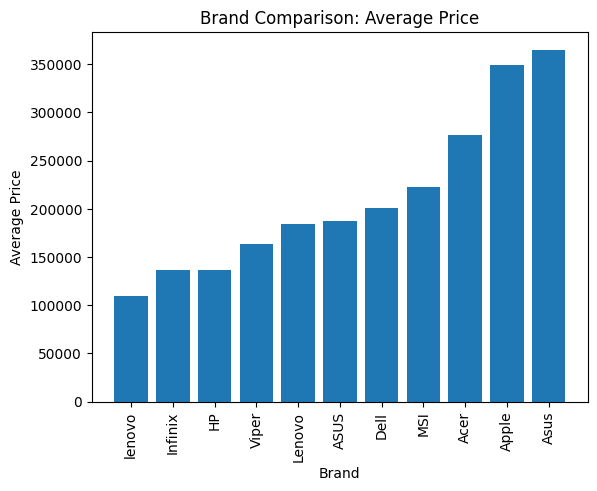

In [32]:
import matplotlib.pyplot as plt

avg_price_by_brand = dfLaptop_copy.groupby('Brand')['Price'].mean().sort_values()

# Create a bar plot
plt.bar(avg_price_by_brand.index, avg_price_by_brand.values)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)

# Display the plot
plt.show()

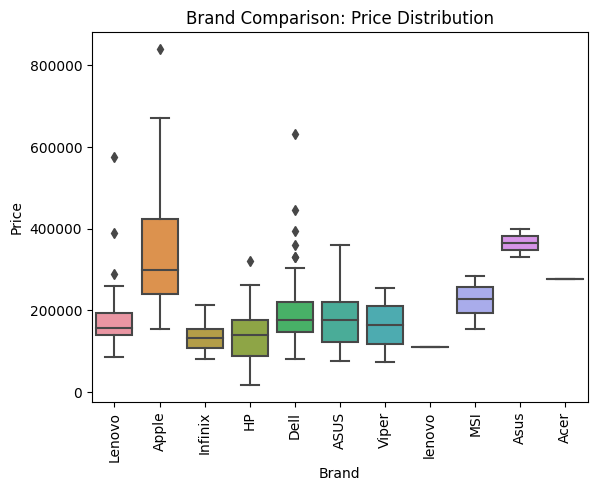

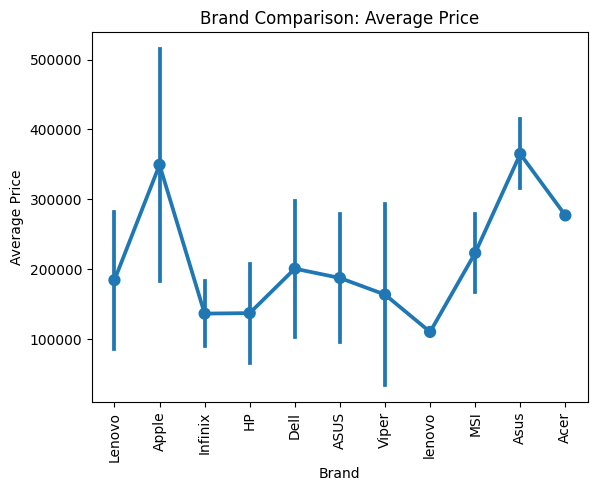

In [33]:
import seaborn as sns

sns.boxplot(data=dfLaptop_copy, x='Brand', y='Price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand Comparison: Price Distribution')
plt.xticks(rotation=90)
plt.show()



sns.pointplot(data=dfLaptop_copy, x='Brand', y='Price', errorbar='sd')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python31

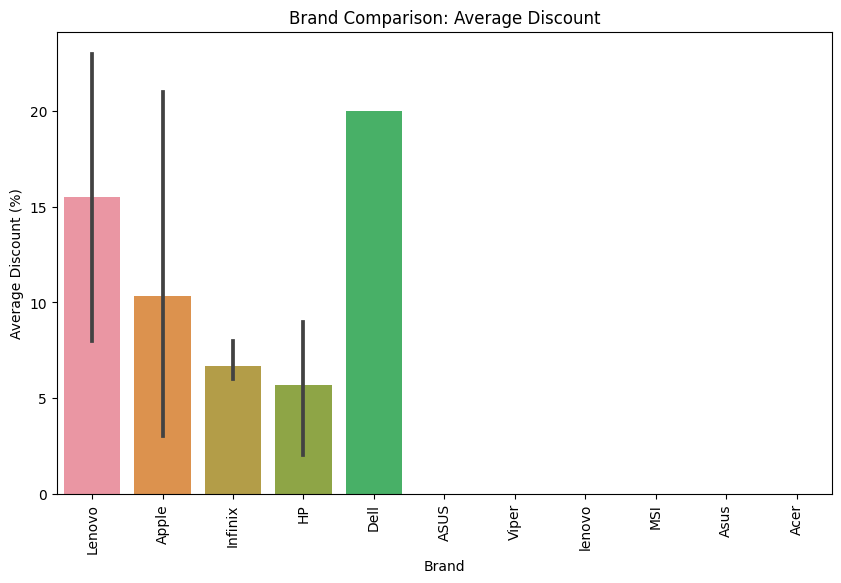

In [34]:
##Bar Plot: A simple bar plot can be used to compare the average discounts for different brands.
plt.figure(figsize=(10, 6))
sns.barplot(data=dfLaptop_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

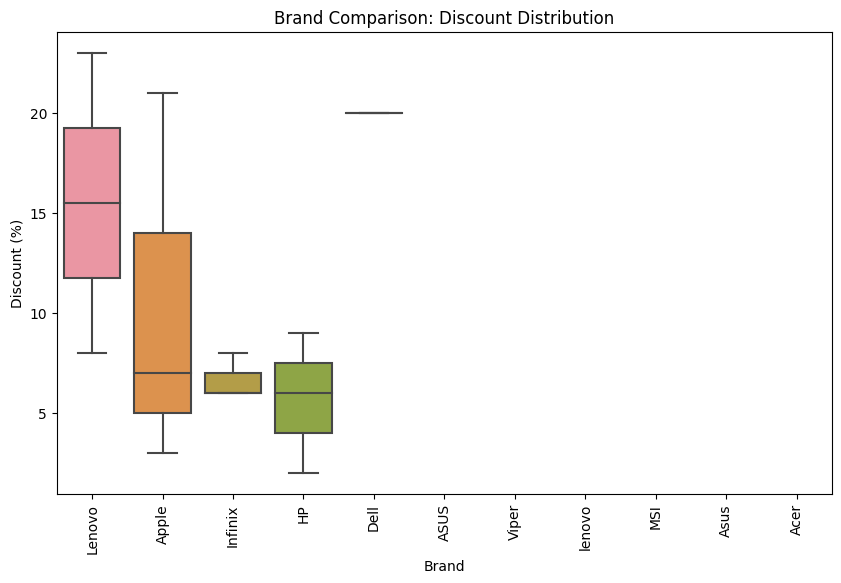

In [35]:
#A box plot can show the distribution of discounts for each brand, allowing you to compare the range and variability of discounts.
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfLaptop_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Discount (%)')
plt.title('Brand Comparison: Discount Distribution')
plt.xticks(rotation=90)
plt.show()

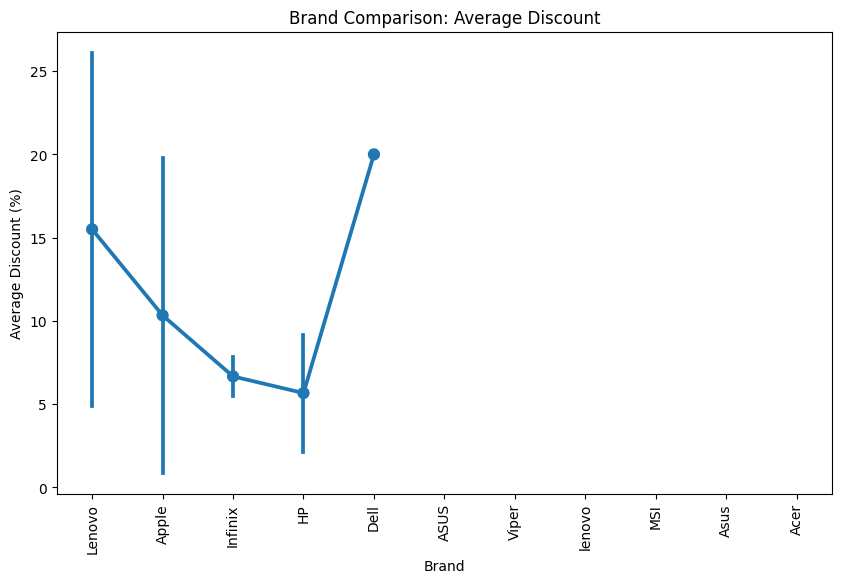

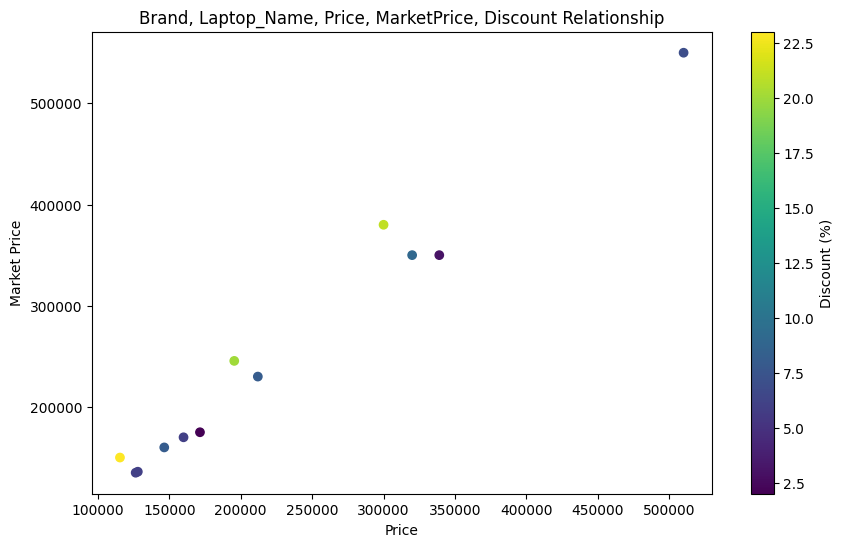

In [36]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=dfLaptop_copy, x='Brand', y='Discount', errorbar='sd')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dfLaptop_copy['Price'], dfLaptop_copy['MarketPrice'], c=dfLaptop_copy['Discount'], cmap='viridis')
plt.colorbar(label='Discount (%)')
plt.xlabel('Price')
plt.ylabel('Market Price')
plt.title('Brand, Laptop_Name, Price, MarketPrice, Discount Relationship')
plt.show()

In [37]:
print('\033[1m' + 'Fetching Data for Smart Watches ' + '\033[0m')

Fetching Data for Smart Watches 


In [38]:
#required libraries
import requests
from bs4 import BeautifulSoup

def getpage(URL,no):
    res = requests.get(URL+str(no))
    return res

watch=getpage("https://priceoye.pk/smart-watches?page=",1)

new_watchlist=[]
watchList=[]


In [39]:
PageNumber=0
addsOnthisPage=1

while addsOnthisPage != 0:
    watch=getpage("https://priceoye.pk/smart-watches?page=",PageNumber+1)

    if(watch.status_code == 200):
        print('Page',PageNumber+1,'Fetched Successfully')

    soup = BeautifulSoup(watch.content, 'html.parser')

    # Total number of Ads on a page
    addsOnthisPage=len(soup.find_all('div', class_='productBox b-productBox'))
    print("Total number of Ads this page :",addsOnthisPage)


    for details in soup.find_all('div', class_='productBox b-productBox'):
        price_diff_retail=None
        price_diff_saving=None
        if details.find(class_='price-diff-retail') is not None:
              price_diff_retail=details.find(class_='price-diff-retail').get_text()
        if details.find(class_='price-diff-saving') is not None:
              price_diff_saving=details.find(class_='price-diff-saving').get_text()
        o=[
            details.find(class_='p-title bold h5').get_text().split()[0],
            details.find(class_='p-title bold h5').get_text().strip(),
            details.find(class_='price-box').get_text().strip(),
            price_diff_retail,
            price_diff_saving,
            details.a.get('href').strip(),
            details.img.get('src').strip()
        ]

        watchList.append(o)


    for i in watchList:
        if i not in new_watchlist:
            new_watchlist.append(i)

    # display(new_list)
    PageNumber=PageNumber+1
    print("Currently on page",PageNumber,"Length of list is",len(new_watchlist),"\n\n")

    # display(new_list)


Page 1 Fetched Successfully
Total number of Ads this page : 35
Currently on page 1 Length of list is 35 


Page 2 Fetched Successfully
Total number of Ads this page : 35
Currently on page 2 Length of list is 70 


Page 3 Fetched Successfully
Total number of Ads this page : 35
Currently on page 3 Length of list is 105 


Page 4 Fetched Successfully
Total number of Ads this page : 35
Currently on page 4 Length of list is 140 


Page 5 Fetched Successfully
Total number of Ads this page : 35
Currently on page 5 Length of list is 175 


Page 6 Fetched Successfully
Total number of Ads this page : 35
Currently on page 6 Length of list is 210 


Page 7 Fetched Successfully
Total number of Ads this page : 29
Currently on page 7 Length of list is 239 


Page 8 Fetched Successfully
Total number of Ads this page : 0
Currently on page 8 Length of list is 239 




In [40]:
# setting Colomn Names
import pandas as pd    

dfwatch = pd.DataFrame(new_watchlist,columns= ['Brand', 'Watch_Name', 'Price', 'MarketPrice','Discount','Link', 'ImageLink'])

dfwatch.to_csv("watchData.csv",index=False)
dfwatch = pd.read_csv('watchData.csv')
display(dfwatch)

,Brand,Watch_Name,Price,MarketPrice,Discount,Link,ImageLink
0,X8,X8 Ultra Bluetooth Calling Watch,"Rs. 4,999","\n Rs. 7,699",\n (35% OFF),https://priceoye.pk/smart-watches/assorted/x8-...,https://static.priceoye.pk/images/product-plac...
1,Xiaomi,Xiaomi Smart Band 7,"Rs. 9,999","\n Rs. 12,500",\n (20% OFF),https://priceoye.pk/smart-watches/xiaomi/xiaom...,https://static.priceoye.pk/images/product-plac...
2,Kieslect,Kieslect Kr Pro Calling Watch,"Rs. 14,899","\n Rs. 19,999",\n (26% OFF),https://priceoye.pk/smart-watches/kieslect/kie...,https://static.priceoye.pk/images/product-plac...
3,Zeblaze,Zeblaze Voice Calling Smartwatch Vibe7 Pro,"Rs. 10,999","\n Rs. 13,999",\n (21% OFF),https://priceoye.pk/smart-watches/zeblaze/zebl...,https://static.priceoye.pk/images/product-plac...
4,Yolo,Yolo Supreme Bluetooth Calling Watch,"Rs. 10,999","\n Rs. 14,999",\n (27% OFF),https://priceoye.pk/smart-watches/yolo/yolo-su...,https://static.priceoye.pk/images/product-plac...
...,...,...,...,...,...,...,...
234,Blulory,Blulory Glifo Smart Watch series 7,"Rs. 5,000",NaN,NaN,https://priceoye.pk/smart-watches/blulory/blul...,https://static.priceoye.pk/images/product-plac...
235,Blulory,Blulory Glifo 2 Pro,"Rs. 5,499",NaN,NaN,https://priceoye.pk/smart-watches/blulory/blul...,https://static.priceoye.pk/images/product-plac...
236,Fitbit,Fitbit Versa 2,"Rs. 28,000",NaN,NaN,https://priceoye.pk/smart-watches/fitbit/fitbi...,https://static.priceoye.pk/images/product-plac...
237,Apple,Apple Watch Ultra (49mm),"Rs. 220,000",NaN,NaN,https://priceoye.pk/smart-watches/apple/apple-...,https://static.priceoye.pk/images/product-plac...


In [41]:
# filter data 
def stringFilteration(x):
 x=str(x)
 return (x.replace('Rs.', '').replace(',', '').replace("\n","").replace(" ","").replace("(","").replace(")","").replace("%",""))


dfwatch_copy = dfwatch.copy(deep=True)
dfwatch_copy['Price'] = dfwatch_copy['Price'].apply(lambda x:float(stringFilteration(x)))
dfwatch_copy['MarketPrice'] = dfwatch_copy['MarketPrice'].apply(lambda x:float(stringFilteration(x)))
dfwatch_copy['Discount'] = dfwatch_copy['Discount'].apply(lambda x:float(stringFilteration(x).replace("OFF","")))


display(dfwatch_copy)

,Brand,Watch_Name,Price,MarketPrice,Discount,Link,ImageLink
0,X8,X8 Ultra Bluetooth Calling Watch,4999.0,7699.0,35.0,https://priceoye.pk/smart-watches/assorted/x8-...,https://static.priceoye.pk/images/product-plac...
1,Xiaomi,Xiaomi Smart Band 7,9999.0,12500.0,20.0,https://priceoye.pk/smart-watches/xiaomi/xiaom...,https://static.priceoye.pk/images/product-plac...
2,Kieslect,Kieslect Kr Pro Calling Watch,14899.0,19999.0,26.0,https://priceoye.pk/smart-watches/kieslect/kie...,https://static.priceoye.pk/images/product-plac...
3,Zeblaze,Zeblaze Voice Calling Smartwatch Vibe7 Pro,10999.0,13999.0,21.0,https://priceoye.pk/smart-watches/zeblaze/zebl...,https://static.priceoye.pk/images/product-plac...
4,Yolo,Yolo Supreme Bluetooth Calling Watch,10999.0,14999.0,27.0,https://priceoye.pk/smart-watches/yolo/yolo-su...,https://static.priceoye.pk/images/product-plac...
...,...,...,...,...,...,...,...
234,Blulory,Blulory Glifo Smart Watch series 7,5000.0,NaN,NaN,https://priceoye.pk/smart-watches/blulory/blul...,https://static.priceoye.pk/images/product-plac...
235,Blulory,Blulory Glifo 2 Pro,5499.0,NaN,NaN,https://priceoye.pk/smart-watches/blulory/blul...,https://static.priceoye.pk/images/product-plac...
236,Fitbit,Fitbit Versa 2,28000.0,NaN,NaN,https://priceoye.pk/smart-watches/fitbit/fitbi...,https://static.priceoye.pk/images/product-plac...
237,Apple,Apple Watch Ultra (49mm),220000.0,NaN,NaN,https://priceoye.pk/smart-watches/apple/apple-...,https://static.priceoye.pk/images/product-plac...


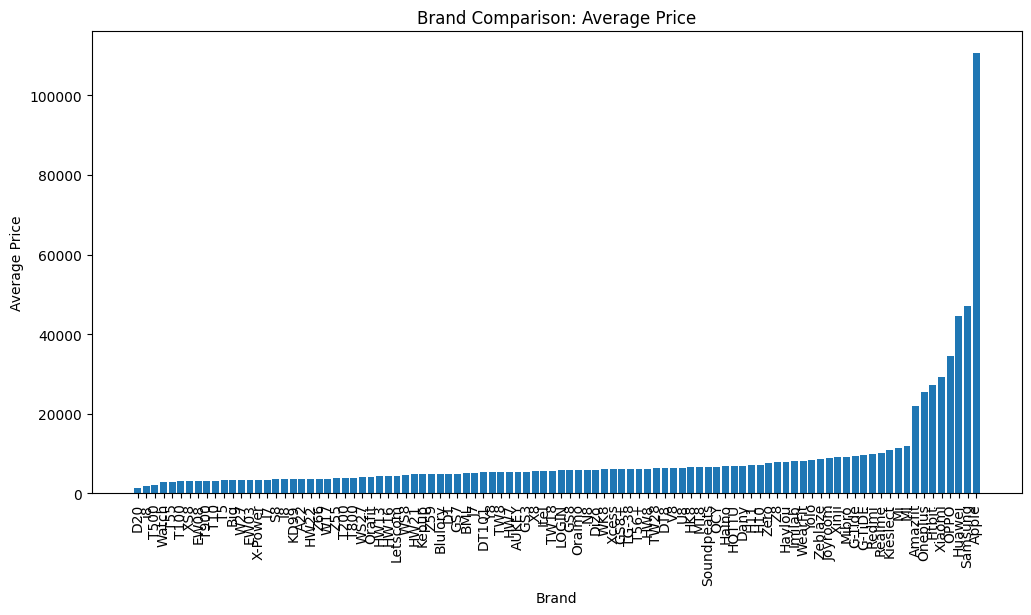

In [57]:
import matplotlib.pyplot as plt

avg_price_by_brand = dfwatch_copy.groupby('Brand')['Price'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_brand.index, avg_price_by_brand.values)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)



# Display the plot
plt.show()

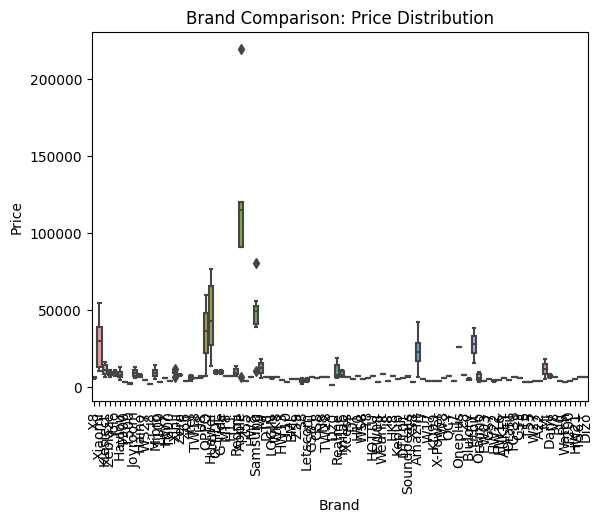

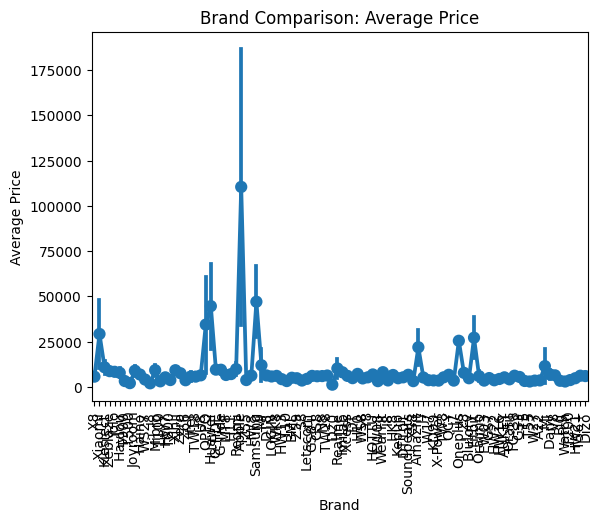

In [66]:
import seaborn as sns

sns.boxplot(data=dfwatch_copy, x='Brand', y='Price')

plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand Comparison: Price Distribution')
plt.xticks(rotation=90)
plt.show()



sns.pointplot(data=dfwatch_copy, x='Brand', y='Price', errorbar='sd')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hussain.raza\AppData\Local\Programs\Python\Python31

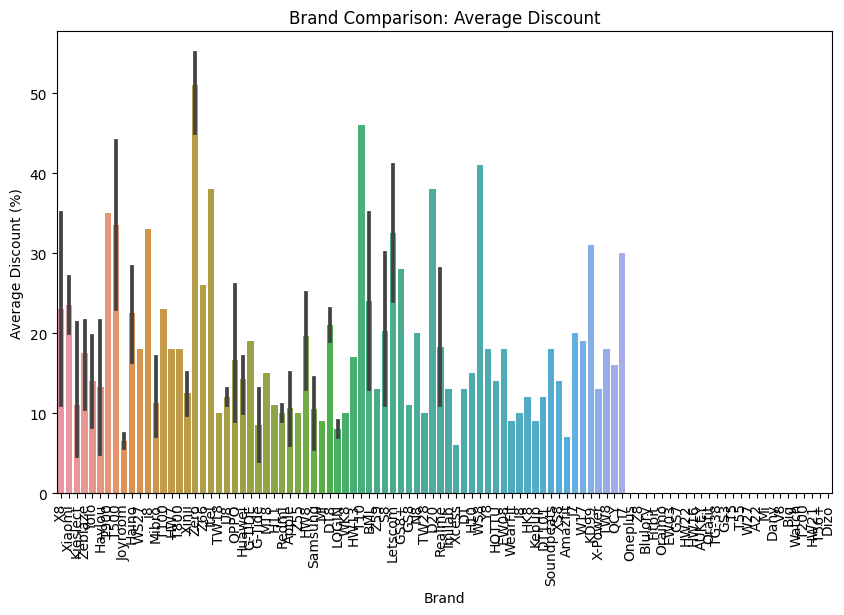

In [44]:
##Bar Plot: A simple bar plot can be used to compare the average discounts for different brands.
plt.figure(figsize=(10, 6))
sns.barplot(data=dfwatch_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

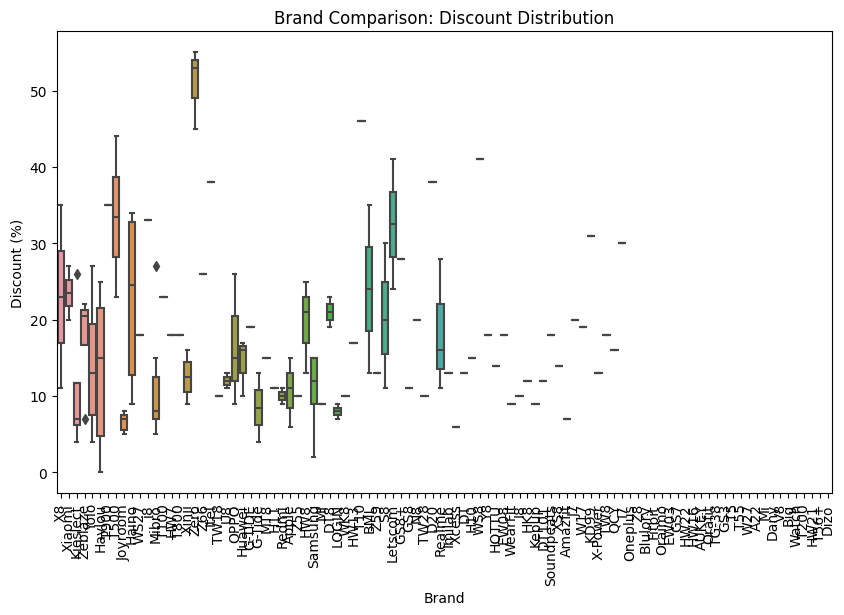

In [45]:
#A box plot can show the distribution of discounts for each brand, allowing you to compare the range and variability of discounts.
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfwatch_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Discount (%)')
plt.title('Brand Comparison: Discount Distribution')
plt.xticks(rotation=90)
plt.show()

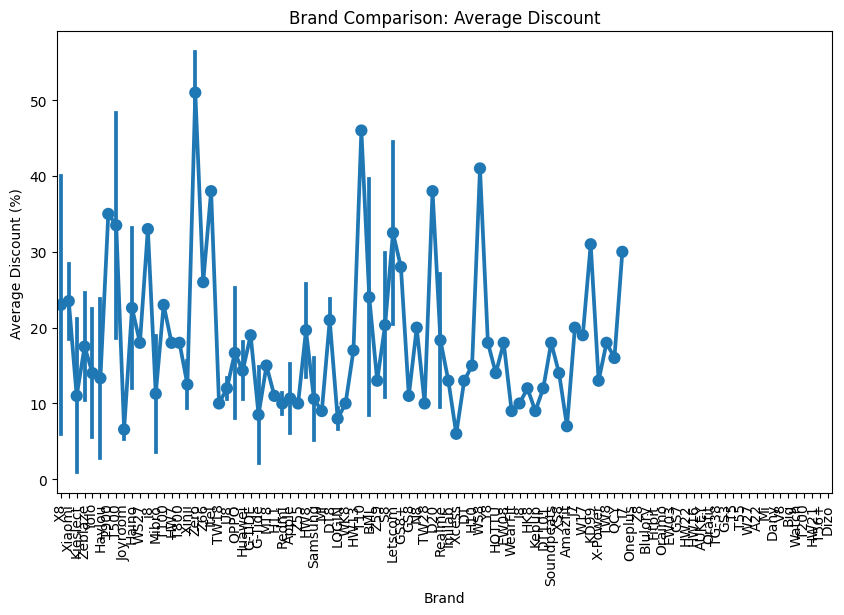

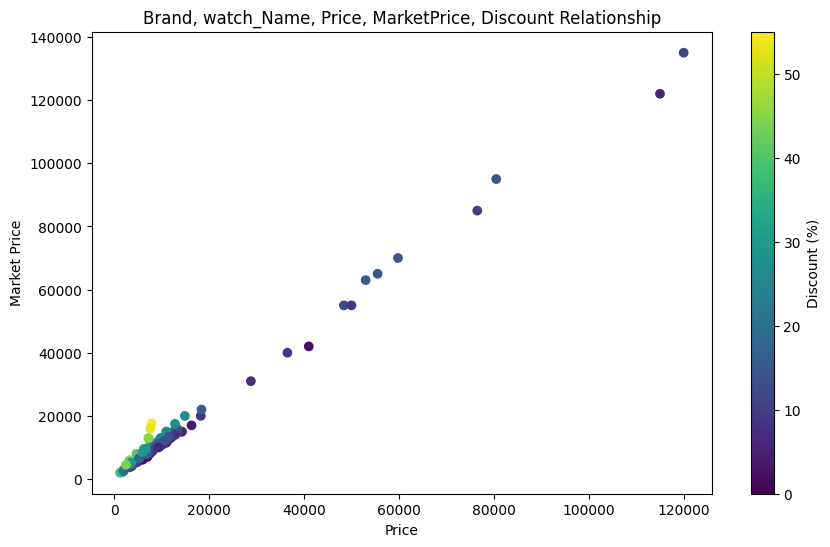

In [46]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=dfwatch_copy, x='Brand', y='Discount', errorbar='sd')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dfwatch_copy['Price'], dfwatch_copy['MarketPrice'], c=dfwatch_copy['Discount'], cmap='viridis')
plt.colorbar(label='Discount (%)')
plt.xlabel('Price')
plt.ylabel('Market Price')
plt.title('Brand, watch_Name, Price, MarketPrice, Discount Relationship')
plt.show()